In [23]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, silhouette_score

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [5]:
print(df['fetal_health'].value_counts().max()/df['fetal_health'].value_counts().sum())

0.7784571966133584


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

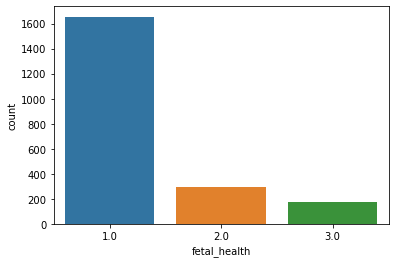

In [8]:
sns.countplot(df['fetal_health'])

In [11]:
print(df['fetal_health'].value_counts().max()/df['fetal_health'].value_counts().sum())

0.7784571966133584


In [12]:
size_1 = 0.65
size_2 = 0.75
size_3 = 0.9

In [13]:
y = df['fetal_health']
max_ = y.value_counts().max()

In [14]:
def subsampling(df, size):
    # We will calculate the number of rows that we will leave for the other classes 
    n_other_classes = int((max_/size - max_)/(len(y.unique())-1))
    print(n_other_classes)
    # We will take randomly n_other_classes lines of each class
    subsample = []
    for label in y.value_counts().index[:2]:
        samples = y[y == label].index.values
        subsample += np.random.choice(samples, n_other_classes).tolist()
    return subsample

In [15]:
subsample_1 =  subsampling(df, size_1)
subsample_2 =  subsampling(df, size_2)
subsample_3 =  subsampling(df, size_3)

445
275
91


In [16]:
max_class_label = y.value_counts().index[2]
df_max_class = df[df['fetal_health']==max_class_label]

df_1 = pd.concat([df_max_class, df.iloc[subsample_1]])
df_2 = pd.concat([df_max_class, df.iloc[subsample_2]])
df_3 = pd.concat([df_max_class, df.iloc[subsample_3]])

#To make sure
print(df_1['fetal_health'].value_counts().max()/df_1['fetal_health'].value_counts().sum())
print(df_2['fetal_health'].value_counts().max()/df_2['fetal_health'].value_counts().sum())
print(df_3['fetal_health'].value_counts().max()/df_3['fetal_health'].value_counts().sum())

0.4174484052532833
0.3787878787878788
0.49162011173184356


In [17]:
df_1.to_csv('df_1.csv',index=False)
df_2.to_csv('df_2.csv',index=False)
df_3.to_csv('df_3.csv',index=False)

In [18]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score

#Create a Random forest Classifier
clf=RandomForestClassifier(n_estimators=5)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)


In [19]:
X = df.iloc[:,[0,1,2,3,4]]
y = df["fetal_health"]

lst_accu_stratified = []
lst_f1score_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    
    lst_accu_stratified.append(clf.score(x_test, y_test))
    lst_f1score_stratified.extend(f1_score(y_test,clf.predict(x_test), average=None))
    
    
    #plot_confusion_matrix(clf, x_train,y_train)

print('List of possible accuracy:', lst_accu_stratified)
print('\nOverall accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nOverall F1 Score:', mean(lst_f1score_stratified)*100, '%')

List of possible accuracy: [0.8544600938967136, 0.8685446009389671, 0.8779342723004695, 0.8403755868544601, 0.8591549295774648, 0.8779342723004695, 0.8632075471698113, 0.8915094339622641, 0.8537735849056604, 0.8632075471698113]

Overall accuracy: 86.50101869076093 %

Overall F1 Score: 73.75475399787076 %


In [20]:
X = df_1.iloc[:,[0,1,2,3,4]]
y = df_1["fetal_health"]

lst_accu_stratified_1 = []
lst_f1score_stratified_1 = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    
    lst_accu_stratified_1.append(clf.score(x_test, y_test))
    lst_f1score_stratified_1.extend(f1_score(y_test,clf.predict(x_test), average=None))
    
    
    #plot_confusion_matrix(clf, x_train,y_train)

print('List of possible accuracy:', lst_accu_stratified_1)
print('\nOverall accuracy:', mean(lst_accu_stratified_1)*100, '%')
print('\nOverall F1 Score:', mean(lst_f1score_stratified_1)*100, '%')

List of possible accuracy: [0.8317757009345794, 0.8785046728971962, 0.794392523364486, 0.8598130841121495, 0.8037383177570093, 0.8785046728971962, 0.8962264150943396, 0.8962264150943396, 0.8113207547169812, 0.8867924528301887]

Overall accuracy: 85.37295009698465 %

Overall F1 Score: 82.44864134349079 %


In [21]:
X = df_2.iloc[:,[0,1,2,3,4]]
y = df_2["fetal_health"]

lst_accu_stratified_2 = []
lst_f1score_stratified_2 = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    
    lst_accu_stratified_2.append(clf.score(x_test, y_test))
    lst_f1score_stratified_2.extend(f1_score(y_test,clf.predict(x_test), average=None))
    
    
    #plot_confusion_matrix(clf, x_train,y_train)

print('List of possible accuracy:', lst_accu_stratified_2)
print('\nOverall accuracy:', mean(lst_accu_stratified_2)*100, '%')
print('\nOverall F1 Score:', mean(lst_f1score_stratified_2)*100, '%')

List of possible accuracy: [0.9178082191780822, 0.7671232876712328, 0.8356164383561644, 0.7534246575342466, 0.8904109589041096, 0.863013698630137, 0.8333333333333334, 0.8611111111111112, 0.8194444444444444, 0.875]

Overall accuracy: 84.16286149162862 %

Overall F1 Score: 83.44788965961403 %


In [22]:
X = df_3.iloc[:,[0,1,2,3,4]]
y = df_3["fetal_health"]

lst_accu_stratified_3 = []
lst_f1score_stratified_3 = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    
    lst_accu_stratified_3.append(clf.score(x_test, y_test))
    lst_f1score_stratified_3.extend(f1_score(y_test,clf.predict(x_test), average=None))
    
    
    #plot_confusion_matrix(clf, x_train,y_train)

print('List of possible accuracy:', lst_accu_stratified_3)
print('\nOverall accuracy:', mean(lst_accu_stratified_3)*100, '%')
print('\nOverall F1 Score:', mean(lst_f1score_stratified_3)*100, '%')

List of possible accuracy: [0.7222222222222222, 0.7222222222222222, 0.75, 0.6388888888888888, 0.6944444444444444, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.7428571428571429, 0.7714285714285715]

Overall accuracy: 71.53174603174604 %

Overall F1 Score: 69.06241961991228 %


In [24]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

X = df.iloc[:,[0,1,2,3,4]]
y = df["fetal_health"]

lst_x_train = []
lst_x_test  = []
lst_y_train = []
lst_y_test  = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test, y_train, y_test  = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    lst_x_train.append(x_train)
    lst_x_test.append(x_test)
    lst_y_train.append(y_train)
    lst_y_test.append(y_test)

In [25]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(x_train)
	distortions.append(sum(np.min(cdist(x_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x_train.shape[0])
	inertias.append(kmeanModel.inertia_)
	mapping1[k] = sum(np.min(cdist(x_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x_train.shape[0]
	mapping2[k] = kmeanModel.inertia_

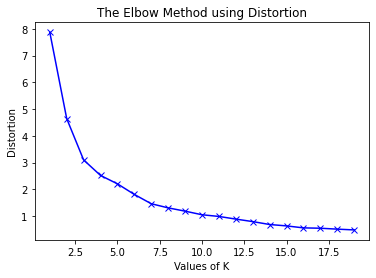

In [26]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


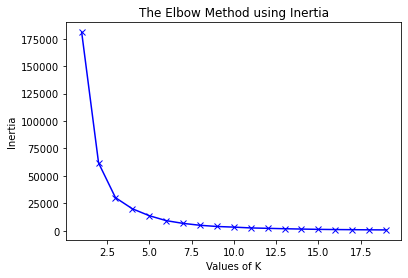

In [27]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

[0.5693891436551177, 0.5624151458556803, 0.5376345189431407, 0.5543965626009615, 0.5589221426280907]


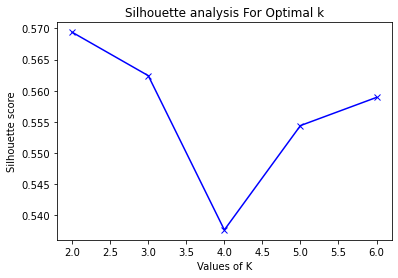

In [28]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x_train)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(x_train, cluster_labels))


print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [29]:
lst_x_train[0]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations
0,120.0,0.000,0.000,0.000,0.000
1,132.0,0.006,0.000,0.006,0.003
2,133.0,0.003,0.000,0.008,0.003
3,134.0,0.003,0.000,0.008,0.003
5,134.0,0.001,0.000,0.010,0.009
...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000
2122,140.0,0.001,0.000,0.007,0.000
2123,140.0,0.001,0.000,0.007,0.000
2124,140.0,0.001,0.000,0.006,0.000


In [30]:
lst_f1_score = []

for i in range(10):
    print('Fold:\t',i+1)
    print('*'*100)
    data = lst_x_train[i]
    kmeanModel = KMeans(n_clusters=5).fit(data)
    data['cluster'] = kmeanModel.labels_
    data['class'] = lst_y_train[i]
    print("Centroid :", kmeanModel.cluster_centers_)
    
    # Cluster 0
    cluster_0 = data[data['cluster']==0]
    print('The classes present in cluster 0:')
    print(cluster_0['class'].unique())
    # Cluster 1
    print('The classes present in cluster 1:')
    cluster_1 = data[data['cluster']==1]
    print(cluster_1['class'].unique())
    # Cluster 2
    print('The classes present in cluster 2:')
    cluster_2 = data[data['cluster']==2]
    print(cluster_2['class'].unique())
    # Cluster 3
    print('The classes present in cluster 3:')
    cluster_3 = data[data['cluster']==3]
    print(cluster_3['class'].unique())
    # Cluster 4
    print('The classes present in cluster 4:')
    cluster_4 = data[data['cluster']==4]
    print(cluster_4['class'].unique())
    
    x_train_0, y_train_0 = cluster_0.iloc[:,[0,1,2,3,4]] , cluster_0["class"]
    x_train_1, y_train_1 = cluster_1.iloc[:,[0,1,2,3,4]] , cluster_1["class"]
    x_train_2, y_train_2 = cluster_2.iloc[:,[0,1,2,3,4]] , cluster_2["class"]
    x_train_3, y_train_3 = cluster_3.iloc[:,[0,1,2,3,4]] , cluster_3["class"]
    x_train_4, y_train_4 = cluster_4.iloc[:,[0,1,2,3,4]] , cluster_4["class"]
    
    lst_clf = [RandomForestClassifier(n_estimators=10)]*5

    lst_clf[0].fit(x_train_0, y_train_0)
    lst_clf[1].fit(x_train_1, y_train_1)
    lst_clf[2].fit(x_train_2, y_train_2)
    lst_clf[3].fit(x_train_3, y_train_3)
    lst_clf[4].fit(x_train_4, y_train_4)
    
    cluster_pred = []
    class_pred   = []
        
    for j in range(len(lst_x_test[i])):
        cluster_pred_j = kmeanModel.predict(lst_x_test[i].iloc[[j]])[0]
        class_pred_j = lst_clf[cluster_pred_j].predict(lst_x_test[i].iloc[[j]])[0]

        cluster_pred.append(cluster_pred_j)
        class_pred.append(class_pred_j)

    lst_x_test[i]['cluster_pred'] = cluster_pred
    lst_x_test[i]['class_pred'] = class_pred
    f1_score_ = f1_score(lst_y_test[i], lst_x_test[i]['class_pred'], average='micro')
    lst_f1_score.append(f1_score_)
    print('f1_score for Fold',i,':\t',f1_score_)
    

    

Fold:	 1
****************************************************************************************************
Centroid : [[1.49019685e+02 2.07480315e-03 2.74409449e-03 3.35433071e-03
  6.69291339e-04]
 [1.31097372e+02 3.69088099e-03 2.24435858e-02 4.94435858e-03
  2.45131376e-03]
 [1.22457002e+02 2.84766585e-03 3.69778870e-03 4.04668305e-03
  2.33660934e-03]
 [1.40005693e+02 3.16888046e-03 3.20683112e-03 3.99620493e-03
  1.55218216e-03]
 [1.12807692e+02 3.61538462e-03 4.44871795e-03 6.44871795e-03
  1.46153846e-03]]
The classes present in cluster 0:
[2. 1. 3.]
The classes present in cluster 1:
[1. 3. 2.]
The classes present in cluster 2:
[2. 3. 1.]
The classes present in cluster 3:
[1. 2. 3.]
The classes present in cluster 4:
[1. 3.]
f1_score for Fold 0 :	 0.7605633802816902
Fold:	 2
****************************************************************************************************
Centroid : [[1.49182540e+02 1.94444444e-03 2.52777778e-03 3.40079365e-03
  7.22222222e-04]
 [1.31113354e

In [32]:
print('F1_scores:\n', lst_f1_score)
print('The Average:', mean(lst_f1_score))
print('Standard Deviation:', stdev(lst_f1_score))

F1_scores:
 [0.7605633802816902, 0.7699530516431926, 0.7652582159624414, 0.7746478873239436, 0.7746478873239436, 0.8215962441314554, 0.7877358490566037, 0.8113207547169812, 0.8160377358490566, 0.7405660377358491]
The Average: 0.7822327044025157
Standard Deviation: 0.02651691374735333


In [34]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

X = df.iloc[:,[0,1,2,3,4]]
y = df["fetal_health"]

lst_x_train = []
lst_x_test  = []
lst_y_train = []
lst_y_test  = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test, y_train, y_test  = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    lst_x_train.append(x_train)
    lst_x_test.append(x_test)
    lst_y_train.append(y_train)
    lst_y_test.append(y_test)

In [35]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(x_train)
	distortions.append(sum(np.min(cdist(x_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x_train.shape[0])
	inertias.append(kmeanModel.inertia_)
	mapping1[k] = sum(np.min(cdist(x_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x_train.shape[0]
	mapping2[k] = kmeanModel.inertia_

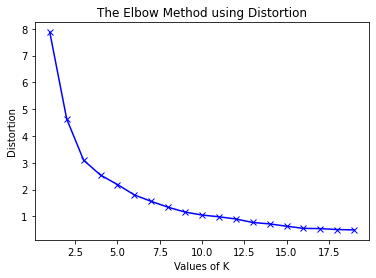

In [36]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

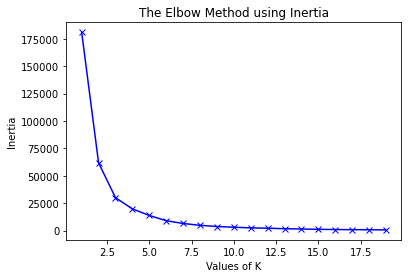

In [37]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

[0.5693891436551177, 0.5624151458556803, 0.5351664542968888, 0.5543965626009615, 0.55875886626367]


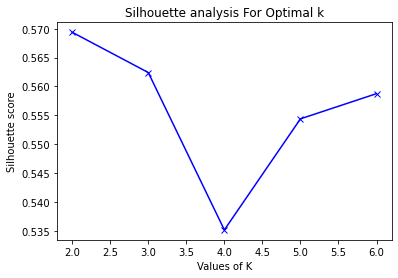

In [38]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x_train)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(x_train, cluster_labels))


print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [39]:
lst_f1_score = []

for i in range(10):
    print('Fold:\t',i+1)
    print('*'*100)
    data = lst_x_train[i]
    kmeanModel = KMeans(n_clusters=5).fit(data)
    data['cluster'] = kmeanModel.labels_
    data['class'] = lst_y_train[i]
    print("Centroid :", kmeanModel.cluster_centers_)
    
    # Cluster 0
    cluster_0 = data[data['cluster']==0]
    print('The classes present in cluster 0:')
    print(cluster_0['class'].unique())
    # Cluster 1
    print('The classes present in cluster 1:')
    cluster_1 = data[data['cluster']==1]
    print(cluster_1['class'].unique())
    # Cluster 2
    print('The classes present in cluster 2:')
    cluster_2 = data[data['cluster']==2]
    print(cluster_2['class'].unique())
    # Cluster 3
    print('The classes present in cluster 3:')
    cluster_3 = data[data['cluster']==3]
    print(cluster_3['class'].unique())
    # Cluster 4
    print('The classes present in cluster 4:')
    cluster_4 = data[data['cluster']==4]
    print(cluster_4['class'].unique())
    
    x_train_0, y_train_0 = cluster_0.iloc[:,[0,1,2,3,4]] , cluster_0["class"]
    x_train_1, y_train_1 = cluster_1.iloc[:,[0,1,2,3,4]] , cluster_1["class"]
    x_train_2, y_train_2 = cluster_2.iloc[:,[0,1,2,3,4]] , cluster_2["class"]
    x_train_3, y_train_3 = cluster_3.iloc[:,[0,1,2,3,4]] , cluster_3["class"]
    x_train_4, y_train_4 = cluster_4.iloc[:,[0,1,2,3,4]] , cluster_4["class"]
    
    lst_clf = [RandomForestClassifier(n_estimators=10)]*5

    lst_clf[0].fit(x_train_0, y_train_0)
    lst_clf[1].fit(x_train_1, y_train_1)
    lst_clf[2].fit(x_train_2, y_train_2)
    lst_clf[3].fit(x_train_3, y_train_3)
    lst_clf[4].fit(x_train_4, y_train_4)
    
    cluster_pred = []
    class_pred   = []
        
    for j in range(len(lst_x_test[i])):
        cluster_pred_j = kmeanModel.predict(lst_x_test[i].iloc[[j]])[0]
        class_pred_j = lst_clf[cluster_pred_j].predict(lst_x_test[i].iloc[[j]])[0]

        cluster_pred.append(cluster_pred_j)
        class_pred.append(class_pred_j)

    lst_x_test[i]['cluster_pred'] = cluster_pred
    lst_x_test[i]['class_pred'] = class_pred
    f1_score_ = f1_score(lst_y_test[i], lst_x_test[i]['class_pred'], average='micro')
    lst_f1_score.append(f1_score_)
    print('f1_score for Fold',i,':\t',f1_score_)
    

    

Fold:	 1
****************************************************************************************************
Centroid : [[1.27971678e+02 3.92592593e-03 2.06274510e-02 4.69281046e-03
  2.52287582e-03]
 [1.42792056e+02 2.66355140e-03 3.97897196e-03 3.44158879e-03
  1.18925234e-03]
 [1.34846899e+02 3.43410853e-03 1.14593023e-02 4.99612403e-03
  2.18217054e-03]
 [1.19434903e+02 2.98614958e-03 3.68421053e-03 4.26869806e-03
  2.07756233e-03]
 [1.51288591e+02 1.57046980e-03 2.32214765e-03 3.76510067e-03
  6.44295302e-04]]
The classes present in cluster 0:
[1. 2. 3.]
The classes present in cluster 1:
[1. 2. 3.]
The classes present in cluster 2:
[1. 3. 2.]
The classes present in cluster 3:
[2. 3. 1.]
The classes present in cluster 4:
[2. 1. 3.]
f1_score for Fold 0 :	 0.7136150234741784
Fold:	 2
****************************************************************************************************
Centroid : [[1.47418478e+02 2.00543478e-03 3.08967391e-03 3.31250000e-03
  6.46739130e-04]
 [1.307213

In [40]:
print('F1_scores:\n', lst_f1_score)
print('The Average:', mean(lst_f1_score))
print('Standard Deviation:', stdev(lst_f1_score))

F1_scores:
 [0.7136150234741784, 0.7793427230046949, 0.8169014084507042, 0.7746478873239436, 0.7230046948356808, 0.7652582159624414, 0.8113207547169812, 0.7075471698113207, 0.7877358490566037, 0.7405660377358491]
The Average: 0.7619939764372398
Standard Deviation: 0.03925225451125978
